<a href="https://colab.research.google.com/github/szulcmaciej/colab-notebooks/blob/main/nn_activation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#   tf.keras.layers.Dense(128,activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(1024,activation='relu'),
  # tf.keras.layers.Dense(128,activation='relu'),
  # tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

model.save('basic_mlp.h5')

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.
Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2362 - accuracy: 0.9315 - val_loss: 0.1138 - val_accuracy: 0.9653
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.9741 - val_loss: 0.0810 - val_accuracy: 0.9746
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0780 - val_accuracy: 0.9761
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9885 - val_loss: 0.0705 - val_accuracy: 0.9763
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0618 - val_accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9946 - val_loss: 0.0633 - val_accuracy: 0.9807
Epoch 7/20
469/469 [=======

In [ ]:
generator = tfds.as_numpy(ds_train.take(1))
x, y = next(generator)

# model = tf.keras.models.load_model('basic_mlp.h5')

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(x)

first_layer_activation = activations[0]
print(activations[1].shape)

(128, 1024)


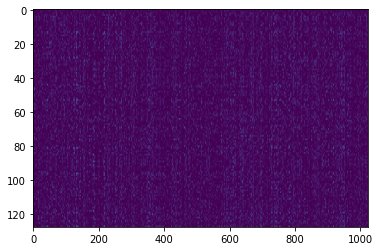

In [ ]:
plt.imshow(activations[1], aspect='auto')

In [ ]:
avg_activations = np.mean(activations[1], axis=0)

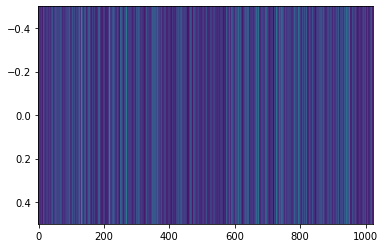

In [ ]:
plt.imshow(avg_activations.reshape(1, avg_activations.shape[0]), aspect='auto')

In [ ]:
pd.Series(avg_activations).sort_values()

74     0.000000
138    0.000000
291    0.000000
879    0.000000
214    0.000000
         ...   
730    1.405801
673    1.537589
218    1.552853
270    1.622867
611    1.741728
Length: 1024, dtype: float32

In [ ]:
activations[1][:, 120]

array([0.        , 0.        , 0.        , 0.        , 1.1089821 ,
       0.        , 1.1195177 , 0.        , 0.        , 0.        ,
       0.6066175 , 0.        , 0.        , 0.        , 0.33069062,
       0.        , 0.        , 0.        , 0.        , 0.27178234,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.221326  ,
       0.        , 0.        , 0.01607407, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08641288, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.6737046 ,
       0.6404999 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48625684, 0.        , 0.42599458, 0.        , 0.        ,
       1.7566571 , 0.17275569, 0.        , 0.        , 0.        ,
       2.5094745 , 0.        , 0.        , 0.        , 0.50853

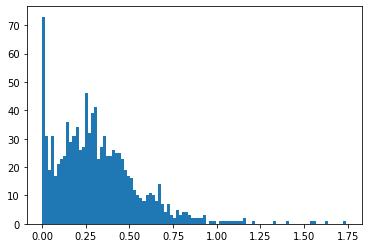

In [ ]:
plt.hist(avg_activations, bins=100);

In [ ]:
# TODO puścić z większą warstwą ukrytą i z wieloma warstwami ukrytymi, spróbować na konwolucyjnych

In [ ]:
cnn_model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, 3, input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(128,activation='relu'),
  # tf.keras.layers.Dense(128,activation='relu'),
  # tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

history = cnn_model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

cnn_model.save('basic_cnn.h5')

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3548 - accuracy: 0.8983 - val_loss: 0.2862 - val_accuracy: 0.9221
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2926 - accuracy: 0.9183 - val_loss: 0.2826 - val_accuracy: 0.9211
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.2876 - val_accuracy: 0.9191
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2741 - accuracy: 0.9233 - val_loss: 0.2800 - val_accuracy: 0.9245
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2671 - accuracy: 0.9244 - val_loss: 0.2828 - val_accuracy: 0.9213
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2642 - accuracy: 0.9250 - val_loss: 0.2845 - val_accuracy: 0.9233
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2601 - accuracy: 0.9269 - val_loss: 0.2860 - val_accuracy: 0.9208
Epoch 

In [ ]:
layer_outputs = [layer.output for layer in cnn_model.layers[:5]]
activation_model = tf.keras.models.Model(inputs=cnn_model.input, outputs=layer_outputs)

activations = activation_model.predict(x)

first_layer_activation = activations[0]
print(activations[0].shape)

(128, 26, 26, 64)


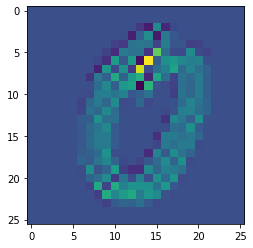

In [ ]:
# activations[0][0,:,:,0].shape
plt.imshow(activations[0][0,:,:,8])